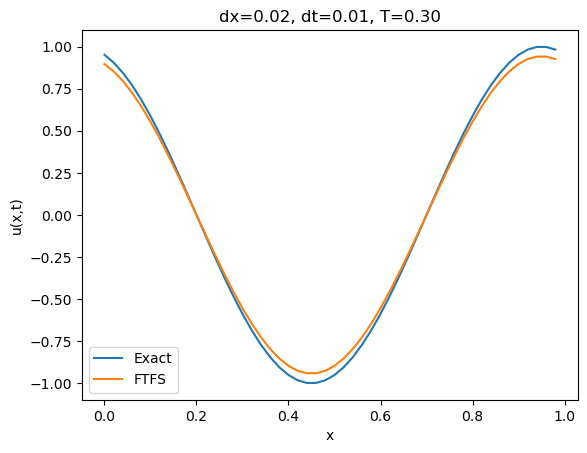

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u_exact = lambda x, t: np.sin(2 * np.pi * (x + t))

# x \in [0,1], t \in [0,T]
dx = 0.02
dt = 0.01

T = 0.3
x = np.linspace(0, 1, int(1 / dx), endpoint=False)
J = len(x)
u = np.zeros((len(x), int(T / dt) + 1))

# Initial condition
u[:, 0] = u_exact(x, 0)

# Periodic boundary condition
# FTFS scheme
for n in range(0, int(T / dt)):
    for j in range(-1, J-1):
        u[j, n + 1] = u[j, n] + dt / dx * (u[j + 1, n] - u[j, n])

# Plotting
plt.plot(x, u_exact(x, T), label='Exact')
plt.plot(x, u[:, -1], label='FTFS')
plt.title('dx=%.2f, dt=%.2f, T=%.2f' % (dx, dt, T))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.savefig('dt%.2f.pdf' % dt)
plt.show()
